# supervised learning

- [1 - linear regression ](#1)
- [2 - logistic regression](#2)
- [3 - regularized logistic regression](#3)


<a name='1'></a>
## linear regression

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [52]:
a=[ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
         8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
         5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
        20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
        13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
         7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
        11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
         5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
         6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
        14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
        10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
         5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
         6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
         7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369]

b=[17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
         4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
         3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
         3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
         3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
        -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
         4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
         5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
         8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
         1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
         5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
         5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
         1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
         6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
         5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.8214 ,
         1.8451 ,  4.2959 ,  7.2029 ,  1.9869 ,  0.14454,  9.0551 ,
         0.61705]

data=np.array(a),np.array(b)

In [53]:
x_train, y_train = data

In [54]:
#know about the data
print('type of x_train:', type(x_train))
print('shape of x_train:', x_train.shape)
print('first five elements of x_train are : \n' , x_train[:5])

print('\n')

print('type of y_train:', type(y_train))
print('shape of y_train:', y_train.shape)
print('first five elements of y_train are : \n' , y_train[:5])

type of x_train: <class 'numpy.ndarray'>
shape of x_train: (97,)
first five elements of x_train are : 
 [6.1101 5.5277 8.5186 7.0032 5.8598]


type of y_train: <class 'numpy.ndarray'>
shape of y_train: (97,)
first five elements of y_train are : 
 [17.592   9.1302 13.662  11.854   6.8233]


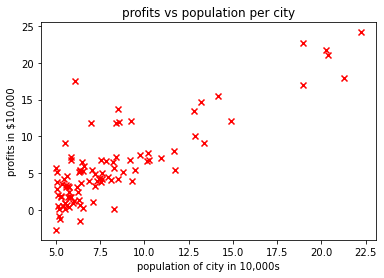

In [55]:
#visualize the data

plt.scatter(x_train,y_train,marker='x',c='r')

plt.title('profits vs population per city')
plt.ylabel('profits in $10,000')
plt.xlabel('population of city in 10,000s')
plt.show()


In [56]:
#compute cost

def compute_cost(x,y,w,b):
    m=x.shape[0]
    total_cost=0
    cost=(x*w+b-y)**2
    cost_j=0
    
    for i in cost:
        cost_j = cost_j + i
    total_cost = cost_j/(2*m)
    
    return total_cost

initial_w = 2
initial_b = 1

cost = compute_cost(x_train,y_train,initial_w,initial_b)
print(f'cost at initial w: {cost:.3f}')

cost at initial w: 75.203


In [57]:
#gradient descent
def compute_gradient(x, y, w, b): 

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
        
    grd_db=w*x+b-y
    grd_db_sum=0

    for i in grd_db:
        grd_db_sum=grd_db_sum+i

    dj_db=grd_db_sum/m       

    grd_dw=(w*x+b-y)*x

    grd_dw_sum=0
    for i in grd_dw:
        grd_dw_sum=grd_dw_sum+i

    dj_dw=grd_dw_sum/m       
        
    return dj_dw, dj_db

initial_w = 0
initial_b = 0

tmp_dj_dw,tmp_dj_db = compute_gradient(x_train,y_train,initial_w,initial_b)

print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


In [58]:
#batch gradient descent

def gradient_descent(x,y,w_in,b_in, cost_function, gradient_function,alpha,num_iters):
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function (x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000:
            cost = cost_function(x,y,w,b)
            J_history.append(cost)
            
        if i%math.ceil(num_iters/10)==0:
            w_history.append(w)
            print(f'iteration {i:4} :cost {float(J_history[-1]):8.2f}')
            
    return w, b, J_history, w_history

In [59]:
initial_w=0.
initial_b=0.

iterations=1500
alpha=0.01

w,b,_,_ = gradient_descent(x_train,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations)

print('w,b found by gradient descent:',w,b)

iteration    0 :cost     6.74
iteration  150 :cost     5.31
iteration  300 :cost     4.96
iteration  450 :cost     4.76
iteration  600 :cost     4.64
iteration  750 :cost     4.57
iteration  900 :cost     4.53
iteration 1050 :cost     4.51
iteration 1200 :cost     4.50
iteration 1350 :cost     4.49
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


Text(0.5, 0, 'population of city in 10,000')

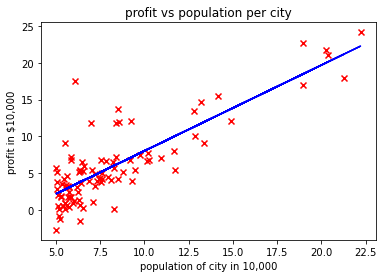

In [60]:
#plot the predict result

m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b
    
plt.plot(x_train,predicted,c='b')
plt.scatter(x_train,y_train,marker='x',c='r')

plt.title('profit vs population per city')
plt.ylabel('profit in $10,000')
#plt.xlabel('population of city in 10,000')

<a name='2'></a>
## logistic regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline

/Users/10019653/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


不知道该怎么处理了，把txt处理成目标格式；先本地用excel处理下试试

In [96]:
#目标格式
a=[[34.62365962451697,78.0246928153624],
   [35.62365962451697,78.0246928153624],
   [36.62365962451697,78.0246928153624]
]

b=[0,1,2]

data=a,b
x_train,y_train=data
x_train

[[34.62365962451697, 78.0246928153624],
 [35.62365962451697, 78.0246928153624],
 [36.62365962451697, 78.0246928153624]]

In [37]:
#txt直接转目标格式失败
with open('ex2data1.txt') as file:
    lines = [line.rstrip().split('\n') for line in file]
    
with open('ex2data1.txt') as f:
    lines = f.readlines()
    
with open('ex2data1.txt') as file:
    for line in file:
        ls = [l.split(',') for l in line]


In [57]:
#txt用pandas转目标格式成功
data = pd.read_csv('ex2data1.txt',sep=',',header=None)

x_train = []
for i in range(len(data)):
    x_train.append([data[0][i],data[1][i]])

y_train = data[2].values

x_train = np.array(x_train) #注意要转成array
y_train = np.array(y_train)


In [58]:
print("First five elements in X_train are:\n", x_train[:5])
print("Type of X_train:",type(x_train))

print('\n')
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

print('\n')
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


First five elements in y_train are:
 [0 0 0 1 1]
Type of y_train: <class 'numpy.ndarray'>


The shape of X_train is: (100, 2)
The shape of y_train is: (100,)


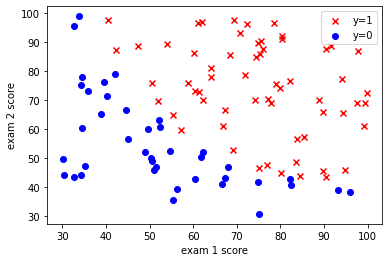

In [122]:
x_train_1 = x_train[y_train==1]
x_train_0 = x_train[y_train==0]

plt.scatter(x_train_1[:,0],x_train_1[:,1],marker='x',c='r',label='y=1')
plt.scatter(x_train_0[:,0],x_train_0[:,1],marker='o',c='b',label='y=0')

plt.legend(loc = 'upper right') #show the legend of scatter label
plt.xlabel('exam 1 score')
plt.ylabel('exam 2 score')
plt.show()



In [19]:
#cost function for logistics regression
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

def compute_cost(x,y,w,b,lambda_=1):
    m,n = x.shape
    loss_sum = 0
    for i in range(m):

        z_sum=0
        for j in range(n):
            z_ij = w[j]*x[i][j]
            z_sum += z_ij
        z = z_sum + b
        f = sigmoid(z)

        loss= -np.log(f)*y[i] - (1-y[i])*np.log(1-f)
        loss_sum += loss
        total_cost=loss_sum/m

    return total_cost

In [20]:
#compute_gradient
def compute_gradient(x, y, w, b, lambda_=None): 
    m, n = x.shape
    cost_w = np.zeros(w.shape)
    cost_b = 0.

    for i in range(m):
        z_w = 0        
        for j in range(n):
            z_w += x[i][j]*w[j]
        z_w += b
        f_yi = sigmoid(z_w)-y[i]
        cost_b += f_yi

        for j in range(n):
            f_yxi= f_yi*x[i][j]
            cost_w[j] += f_yxi
            
    dj_db = cost_b /m  
    dj_dw = cost_w*(1/m)
    
    return dj_db, dj_dw

In [21]:
# learning parameters using gradient descent

def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters,lambda_):
    m = len(x)
    J_history = []
    w_history = []
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(x,y,w_in,b_in,lambda_)
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
        
        if i < 100000:
            cost = cost_function(x,y,w_in,b_in,lambda_)
            J_history.append(cost)
            
        if i%math.ceil(num_iters/10) == 0 or i==(num_iters-1):
            w_history.append(w_in)
            print(f'iteration {i:4} : cost {float(J_history[-1]):8.2f}')
            
    return w_in, b_in,J_history,w_history
            

In [22]:
initial_b = -8
initial_w = np.array([10,10])
iterations = 10000
alpha = 0.001

w,b,J_history,_ = gradient_descent(x_train,y_train,initial_w,
                                  initial_b,compute_cost,compute_gradient,alpha,iterations,0)

iteration    0 : cost     3.77
iteration 1000 : cost     3.69
iteration 2000 : cost     3.62
iteration 3000 : cost     3.56
iteration 4000 : cost     3.49
iteration 5000 : cost     3.43
iteration 6000 : cost     3.37
iteration 7000 : cost     3.31
iteration 8000 : cost     3.25
iteration 9000 : cost     3.19
iteration 9999 : cost     3.14


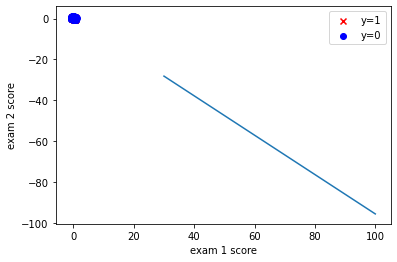

In [23]:
#decision boundary means: w[0]*x + w[1]*y +b = 0.5

x = [30,100]
y = [(0.5-b-w[0]*30)/w[1],(0.5-b-w[0]*100)/w[1]]


x_train_1 = x_train[y_train==1]
x_train_0 = x_train[y_train==0]

plt.scatter(x_train_1[:,0],x_train_1[:,1],marker='x',c='r',label='y=1')
plt.scatter(x_train_0[:,0],x_train_0[:,1],marker='o',c='b',label='y=0')
plt.plot(x,y)

plt.legend(loc = 'upper right') #show the legend of scatter label
plt.xlabel('exam 1 score')
plt.ylabel('exam 2 score')
plt.show()

In [24]:
#evaluating logistic regression

def predict(x,w,b):
    m,n=x.shape
    p = np.zeros(m)
    
    for i in range(m):
        z_wb=0

        for j in range(n):
            z_wb += x[i][j]*w[j]

        z_wb += b

        f = sigmoid (z_wb)

        if f >= 0.5:
            p[i]=1
        else:
            p[i]=0

    return p

p = predict(x_train,w,b)
print('train accuracy: %f'%(np.mean(p == y_train) * 100))

train accuracy: 42.372881


<a name='3'></a>

## regularized logistic regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd

%matplotlib inline

#pip install pandas --upgrade

/Users/10019653/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
#txt用pandas转目标格式成功,只适用于两个特征，一个目标值
data = pd.read_csv('ex2data2.txt',sep=',',header=None)

x_train = []
for i in range(len(data)):
    x_train.append([data[0][i],data[1][i]])

y_train = data[2].values

x_train = np.array(x_train) #注意要转成array
y_train = np.array(y_train)


In [6]:
print("First five elements in X_train are:\n", x_train[:5])
print("Type of X_train:",type(x_train))

print('\n')
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

print('\n')
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))

First five elements in X_train are:
 [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>


First five elements in y_train are:
 [1 1 1 1 1]
Type of y_train: <class 'numpy.ndarray'>


The shape of X_train is: (118, 2)
The shape of y_train is: (118,)


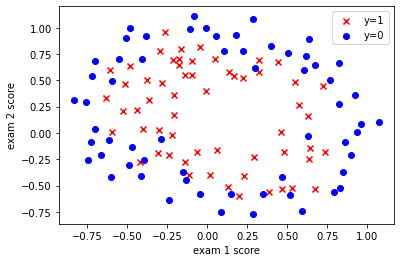

In [12]:
x_train_1 = x_train[y_train==1]
x_train_0 = x_train[y_train==0]

plt.scatter(x_train_1[:,0],x_train_1[:,1],marker='x',c='r',label='y=1')
plt.scatter(x_train_0[:,0],x_train_0[:,1],marker='o',c='b',label='y=0')

plt.legend(loc = 'upper right') #show the legend of scatter label
plt.xlabel('exam 1 score')
plt.ylabel('exam 2 score')
plt.show()



feature mapping是指使用已有的特征，拓展到更多特征；例如 x1, x2 , x1*x2, x1^2*x2...

没有使用feature mapping的，cost = 0.96; 使用feature map，cost = 0.45

In [33]:
import sklearn

In [34]:
sklearn.preprocessing.PolynomialFeatures(degree=2)

AttributeError: module 'sklearn' has no attribute 'preprocessing'

In [38]:
#feature mapping

degree = 6

x1 = x_train[:,0]
x2 = x_train[:,1]


for i in range(1,degree+1):
    print(i)
    for j in range(i+1):
        print(np.multiply(np.power(x1,i),np.power(x2,j)))

1
[ 0.051267  -0.092742  -0.21371   -0.375     -0.51325   -0.52477
 -0.39804   -0.30588    0.016705   0.13191    0.38537    0.52938
  0.63882    0.73675    0.54666    0.322      0.16647   -0.046659
 -0.17339   -0.47869   -0.60541   -0.62846   -0.59389   -0.42108
 -0.11578    0.20104    0.46601    0.67339   -0.13882   -0.29435
 -0.26555   -0.16187   -0.17339   -0.28283   -0.36348   -0.30012
 -0.23675   -0.06394    0.062788   0.22984    0.2932     0.48329
  0.64459    0.46025    0.6273     0.57546    0.72523    0.22408
  0.44297    0.322      0.13767   -0.0063364 -0.092742  -0.20795
 -0.20795   -0.43836   -0.21947   -0.13882    0.18376    0.22408
  0.29896    0.50634    0.61578    0.60426    0.76555    0.92684
  0.82316    0.96141    0.93836    0.86348    0.89804    0.85196
  0.82892    0.79435    0.59274    0.51786    0.46601    0.35081
  0.28744    0.085829   0.14919   -0.13306   -0.40956   -0.39228
 -0.74366   -0.69758   -0.75518   -0.69758   -0.4038    -0.38076
 -0.50749   -0.54781  

In [14]:
#compute cost reg

def compute_cost_reg(x, y, w, b, lambda_ = 1):
    m, n = x.shape
    cost_without_reg = compute_cost(x, y, w, b) 
    
    reg_cost = 0.

    for j in range(n):
        reg_cost += w[j]**2

    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

In [15]:
#compute gradient reg

def compute_gradient_reg(x, y, w, b, lambda_ = 1): 

    m, n = x.shape
    dj_db, dj_dw = compute_gradient(x, y, w, b)
    dj_dw_j_reg=0
    
    for j in range(n):
        dj_dw_j_reg = lambda_ *(1/m)*w[j]
        dj_dw[j] += dj_dw_j_reg 
                
    return dj_db, dj_dw

In [26]:
#learning parameters using gradient descent

initial_w = np.random.rand(x_train.shape[1])-0.5
initial_b = 1.

lambda_ = 0.01
iterations = 10000
alpha = 0.01

w,b,J_history,_ = gradient_descent(x_train,y_train,initial_w,initial_b,
                                   compute_cost_reg,compute_gradient_reg,alpha,iterations,lambda_)

iteration    0 : cost     0.83
iteration 1000 : cost     0.69
iteration 2000 : cost     0.69
iteration 3000 : cost     0.69
iteration 4000 : cost     0.69
iteration 5000 : cost     0.69
iteration 6000 : cost     0.69
iteration 7000 : cost     0.69
iteration 8000 : cost     0.69
iteration 9000 : cost     0.69
iteration 9999 : cost     0.69


In [28]:
#map feature 的 decision boundary 怎么画